<a href="https://colab.research.google.com/github/SNEHA-S-J/AI---powered-content-analysis-and-recommendation/blob/main/CIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**AI - powered content analysis and recommendation**


### ✅ **STEP 1: Load and Clean the Data**

1. **Import required modules** (`csv`, `pandas`).
2. **Read the CSV file** using the `csv` module to handle malformed rows.
3. **Filter valid rows** by keeping only those with exactly 6 columns.
4. **Create a DataFrame** with the expected column names: `['title', 'text', 'url', 'authors', 'timestamp', 'tags']`.
5. **Drop the first row if necessary** (usually header duplication or malformed data).
6. **Convert timestamp** to `datetime` using `pd.to_datetime()` with `format='mixed'`.
7. **Convert authors and tags columns** from strings to lists using `ast.literal_eval()`.


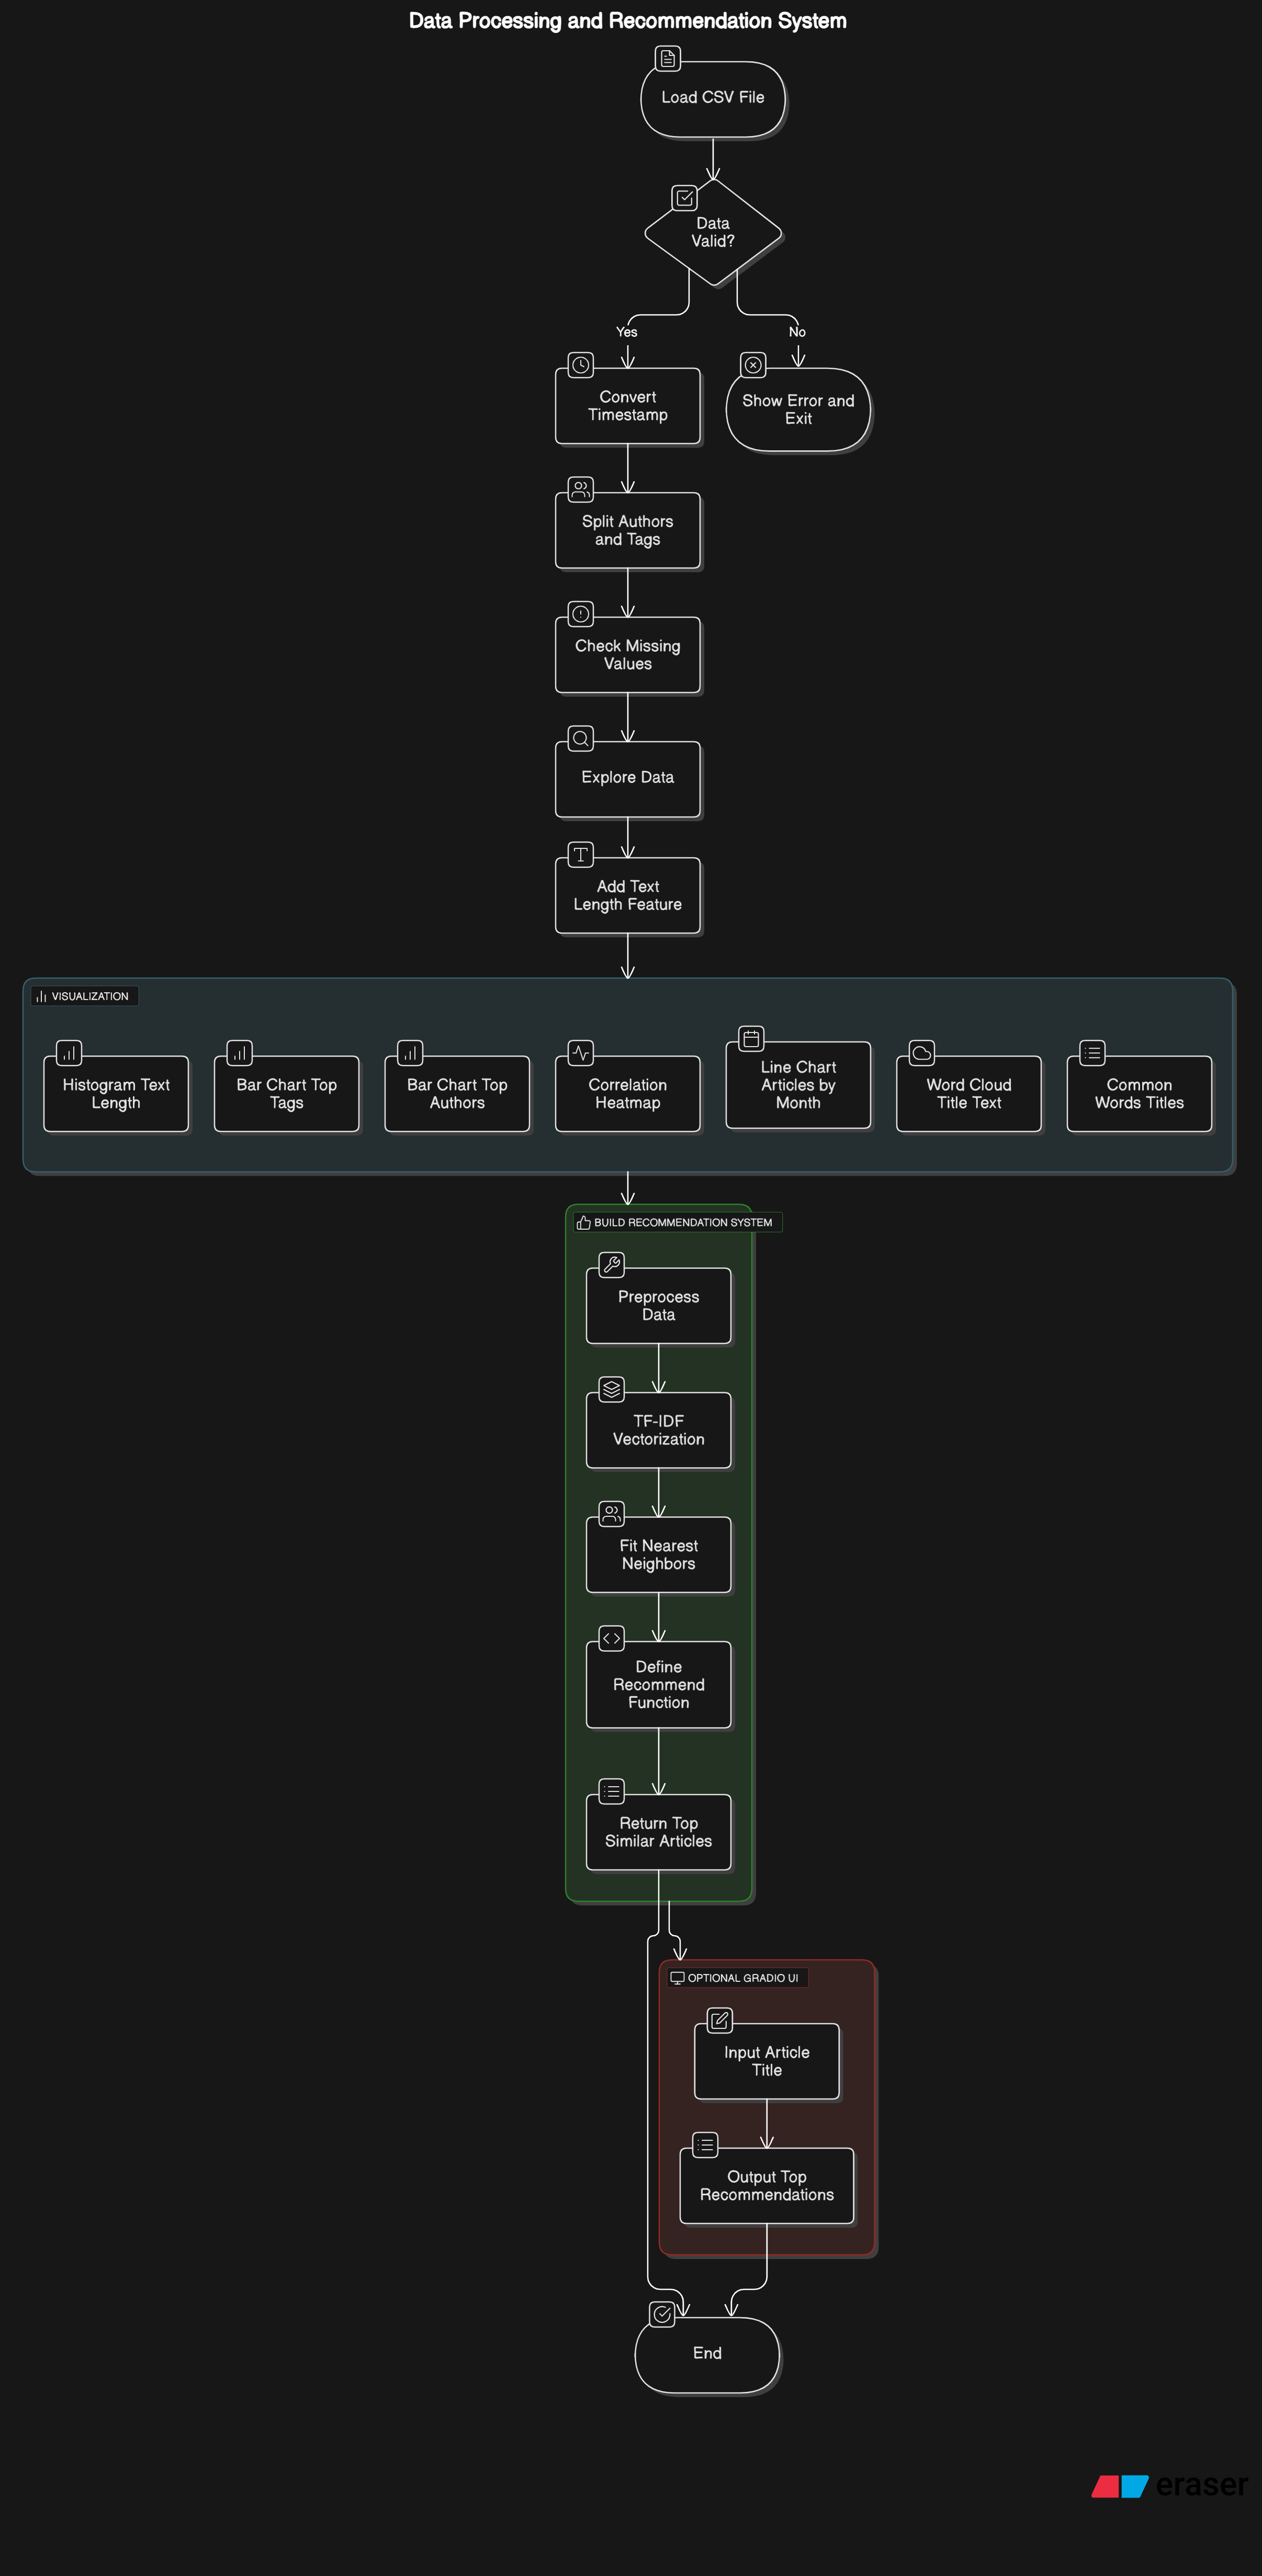

In [1]:
import csv

file_path = '/content/AI-Powered Content Analysis and Recommendation.csv'

# Read file safely with built-in csv module
rows = []
with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
    reader = csv.reader(f)
    for row in reader:
        # Only keep rows with the expected number of columns (e.g., 6 columns: title, text, url, authors, timestamp, tags)
        if len(row) == 6:
            rows.append(row)

# Preview how many good rows we got
print(f"Loaded {len(rows)} valid rows.")


Loaded 546 valid rows.


In [2]:
import pandas as pd

columns = ['title', 'text', 'url', 'authors', 'timestamp', 'tags']
df = pd.DataFrame(rows, columns=columns)

# Now preview it
df.head()



,title,text,url,authors,timestamp,tags
0,title,text,url,authors,timestamp,tags
1,Mental Note Vol. 24,Photo by Josh Riemer on Unsplash\n\nMerry Chri...,https://medium.com/invisible-illness/mental-no...,['Ryan Fan'],2020-12-26 03:38:10.479000+00:00,"['Mental Health', 'Health', 'Psychology', 'Sci..."
2,Your Brain On Coronavirus,Your Brain On Coronavirus\n\nA guide to the cu...,https://medium.com/age-of-awareness/how-the-pa...,['Simon Spichak'],2020-09-23 22:10:17.126000+00:00,"['Mental Health', 'Coronavirus', 'Science', 'P..."
3,Mind Your Nose,Mind Your Nose\n\nHow smell training can chang...,https://medium.com/neodotlife/mind-your-nose-f...,[],2020-10-10 20:17:37.132000+00:00,"['Biotechnology', 'Neuroscience', 'Brain', 'We..."
4,The 4 Purposes of Dreams,Passionate about the synergy between science a...,https://medium.com/science-for-real/the-4-purp...,['Eshan Samaranayake'],2020-12-21 16:05:19.524000+00:00,"['Health', 'Neuroscience', 'Mental Health', 'P..."


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      546 non-null    object
 1   text       546 non-null    object
 2   url        546 non-null    object
 3   authors    546 non-null    object
 4   timestamp  546 non-null    object
 5   tags       546 non-null    object
dtypes: object(6)
memory usage: 25.7+ KB


In [4]:
df.isnull().sum()


,0
title,0
text,0
url,0
authors,0
timestamp,0
tags,0


In [5]:
df.sample(5)


,title,text,url,authors,timestamp,tags
169,My Nervous System Needs To Talk,My Nervous System Needs To Talk\n\nHe Just Has...,https://medium.com/the-haven/my-nervous-system...,['Max K. Erkiletian'],2020-09-09 18:48:33.151000+00:00,"['Humor', 'Neuroscience', 'Relationships', 'Br..."
104,Write for Towards Data Science,Guidelines\n\nHow to get your article ready fo...,https://towardsdatascience.com/questions-96667...,['Tds Editors'],2020-12-12 23:54:52.970000+00:00,"['Writers’ Guide', 'Join Us', 'Tds Team', 'Wri..."
493,It’s Not ‘Writer’s Block’ — It’s Emptiness.,The phrase ‘Writer’s Block’ looms over all of ...,https://medium.com/swlh/its-not-writer-s-block...,['Christina Hope'],2020-04-07 04:12:53.807000+00:00,"['Creative Process', 'Mental Health', 'Creativ..."
142,The Man Who Cut Off His Own Hand to Avoid Cert...,The Man Who Cut Off His Own Hand to Avoid Cert...,https://medium.com/history-of-yesterday/the-ma...,['Andrei Tapalaga'],2020-12-28 13:30:38.952000+00:00,"['Life Lessons', 'Health', 'History', 'Mental ..."
75,What It’s Like to Have an ADHD Brain,What It’s Like to Have an ADHD Brain\n\nAnd ho...,https://elemental.medium.com/what-its-like-to-...,['Natalie Slivinski'],2019-09-27 18:16:52.358000+00:00,"['Mental Health', 'Brain', 'Psychology', 'Grea..."


In [6]:
df.nunique()


,0
title,545
text,544
url,546
authors,371
timestamp,545
tags,540


In [7]:
df = df.drop(index=0).reset_index(drop=True)


In [8]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='mixed')


In [9]:
import ast

df['authors'] = df['authors'].apply(ast.literal_eval)
df['tags'] = df['tags'].apply(ast.literal_eval)


In [10]:
df.isnull().sum()


,0
title,0
text,0
url,0
authors,0
timestamp,0
tags,0


In [11]:
df.head(3)

,title,text,url,authors,timestamp,tags
0,Mental Note Vol. 24,Photo by Josh Riemer on Unsplash\n\nMerry Chri...,https://medium.com/invisible-illness/mental-no...,[Ryan Fan],2020-12-26 03:38:10.479000+00:00,"[Mental Health, Health, Psychology, Science, N..."
1,Your Brain On Coronavirus,Your Brain On Coronavirus\n\nA guide to the cu...,https://medium.com/age-of-awareness/how-the-pa...,[Simon Spichak],2020-09-23 22:10:17.126000+00:00,"[Mental Health, Coronavirus, Science, Psycholo..."
2,Mind Your Nose,Mind Your Nose\n\nHow smell training can chang...,https://medium.com/neodotlife/mind-your-nose-f...,[],2020-10-10 20:17:37.132000+00:00,"[Biotechnology, Neuroscience, Brain, Wellness,..."


In [12]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   title      545 non-null    object             
 1   text       545 non-null    object             
 2   url        545 non-null    object             
 3   authors    545 non-null    object             
 4   timestamp  545 non-null    datetime64[ns, UTC]
 5   tags       545 non-null    object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 25.7+ KB


,title,text,url,authors,timestamp,tags
count,545,545,545,545,545,545
unique,544,543,545,370,NaN,539
top,"Long-Covid Risk Factors, Symptoms, and Treatme...",We believe monetization is a hidden secret. Se...,https://medium.com/mashable/how-to-recycle-all...,[],NaN,"[Creativity, Byob, Blogging, Productivity, Wri..."
freq,2,2,1,22,NaN,3
mean,NaN,NaN,NaN,NaN,2020-04-09 07:43:08.390444032+00:00,NaN
min,NaN,NaN,NaN,NaN,2016-07-06 19:45:00.648000+00:00,NaN
25%,NaN,NaN,NaN,NaN,2019-12-30 20:32:09.324000+00:00,NaN
50%,NaN,NaN,NaN,NaN,2020-08-04 16:48:15.263000064+00:00,NaN
75%,NaN,NaN,NaN,NaN,2020-11-23 17:48:03.183000064+00:00,NaN
max,NaN,NaN,NaN,NaN,2020-12-30 12:54:40.352000+00:00,NaN


### ✅ **STEP 2: Basic Data Exploration**

8. Check for:
   - **Missing values** with `df.isnull().sum()`.
   - **Basic info** using `df.info()` and `df.describe()`.
   - **Unique values** with `df.nunique()`.
   - **Random samples** using `df.sample()`.


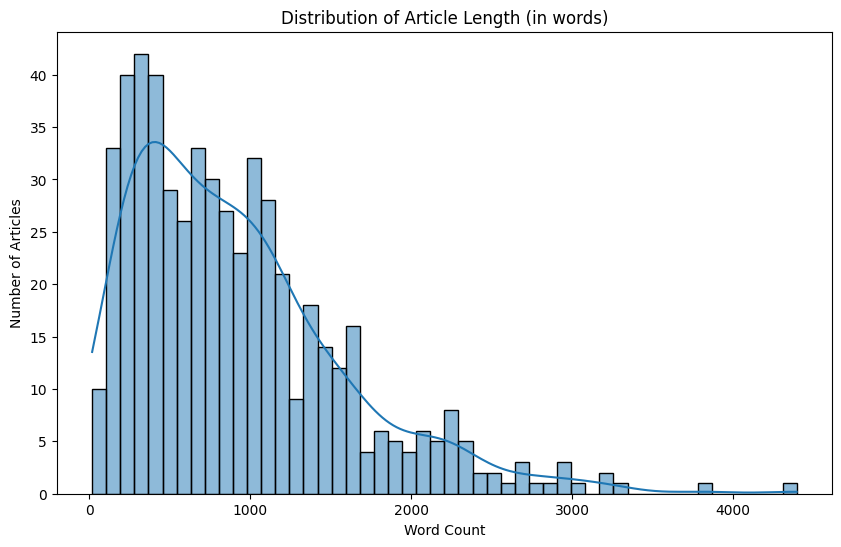

In [13]:
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Article Length (in words)')
plt.xlabel('Word Count')
plt.ylabel('Number of Articles')
plt.show()


<ipython-input-14-17e88e90b17f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tags_df, x='Count', y='Tag', palette='viridis')


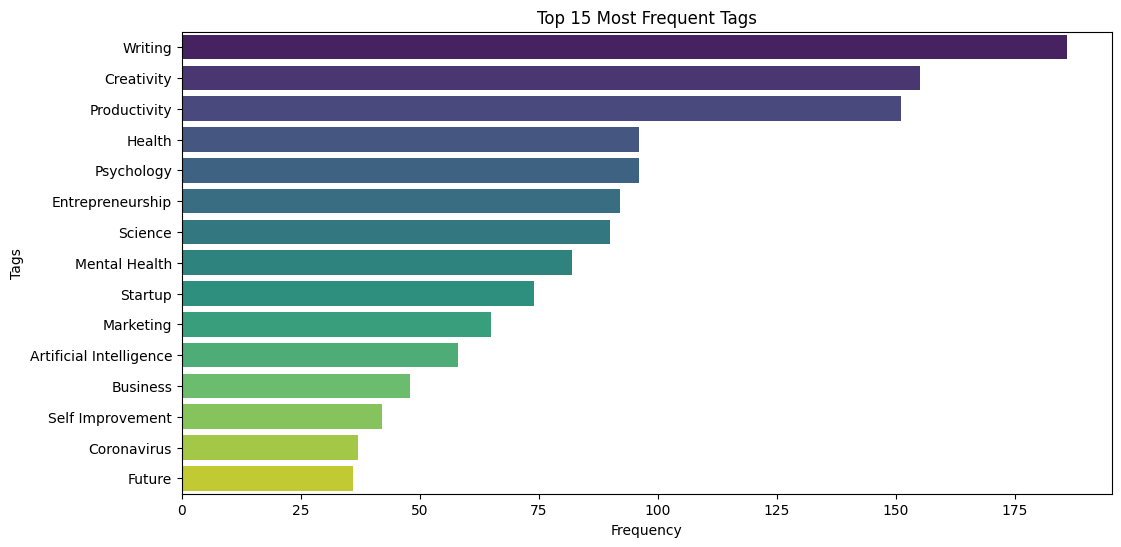

In [14]:
from collections import Counter

all_tags = [tag for sublist in df['tags'] for tag in sublist]
tag_counts = Counter(all_tags)

top_tags = tag_counts.most_common(15)
tags_df = pd.DataFrame(top_tags, columns=['Tag', 'Count'])

plt.figure(figsize=(12,6))
sns.barplot(data=tags_df, x='Count', y='Tag', palette='viridis')
plt.title('Top 15 Most Frequent Tags')
plt.xlabel('Frequency')
plt.ylabel('Tags')
plt.show()


<ipython-input-15-17e88e90b17f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tags_df, x='Count', y='Tag', palette='viridis')


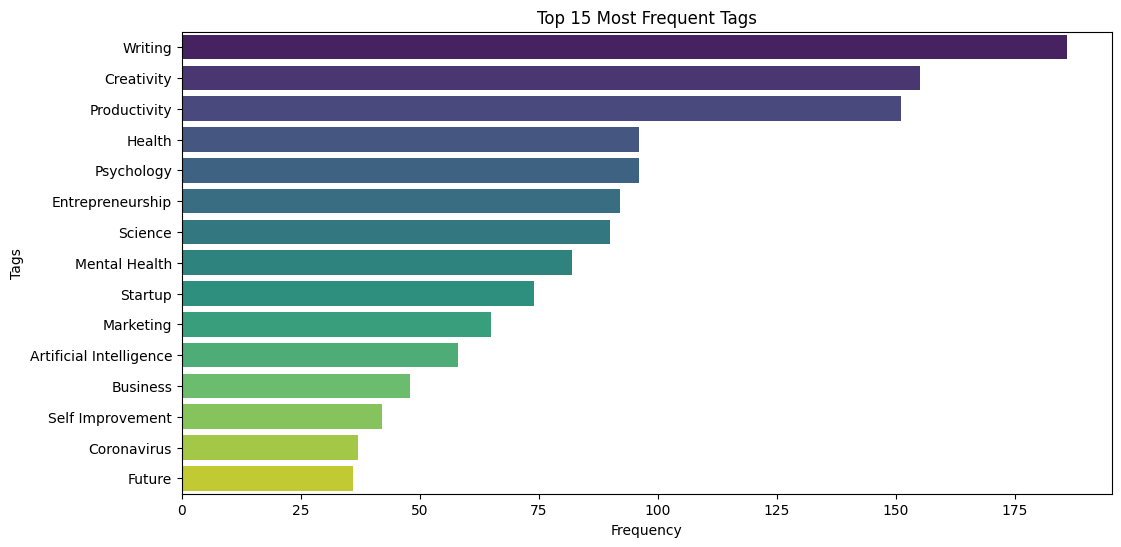

In [15]:
from collections import Counter

all_tags = [tag for sublist in df['tags'] for tag in sublist]
tag_counts = Counter(all_tags)

top_tags = tag_counts.most_common(15)
tags_df = pd.DataFrame(top_tags, columns=['Tag', 'Count'])

plt.figure(figsize=(12,6))
sns.barplot(data=tags_df, x='Count', y='Tag', palette='viridis')
plt.title('Top 15 Most Frequent Tags')
plt.xlabel('Frequency')
plt.ylabel('Tags')
plt.show()



### ✅ **STEP 3: Feature Engineering**

9. Create a new column `text_length` by counting the number of words in each article:
   ```python
   df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))
   ```

<ipython-input-16-6ebeb2dd4998>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=authors_df, x='Articles', y='Author', palette='coolwarm')


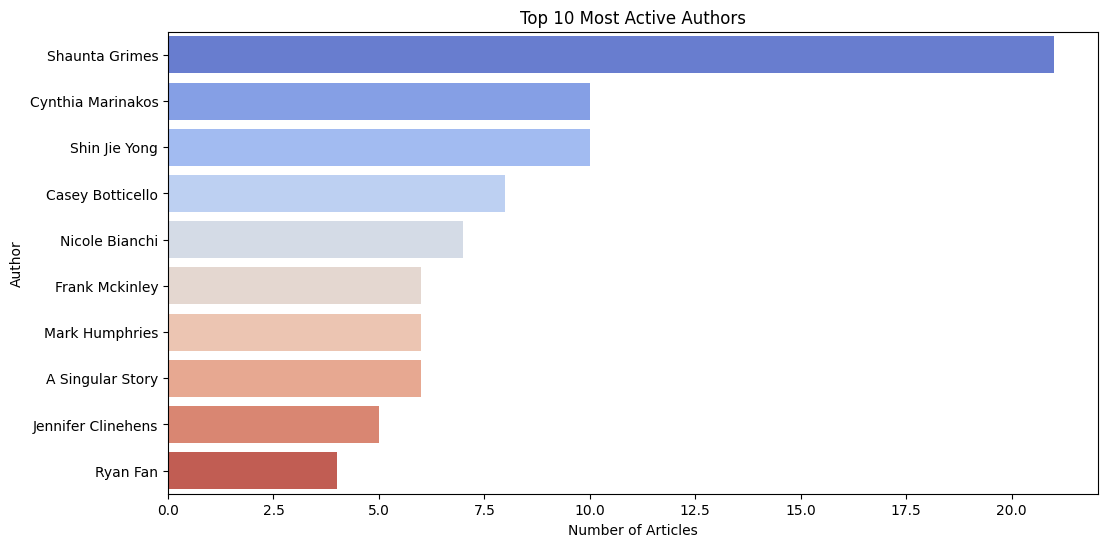

In [16]:
all_authors = [author for sublist in df['authors'] for author in sublist]
author_counts = Counter(all_authors)

top_authors = author_counts.most_common(10)
authors_df = pd.DataFrame(top_authors, columns=['Author', 'Articles'])

plt.figure(figsize=(12,6))
sns.barplot(data=authors_df, x='Articles', y='Author', palette='coolwarm')
plt.title('Top 10 Most Active Authors')
plt.xlabel('Number of Articles')
plt.ylabel('Author')
plt.show()


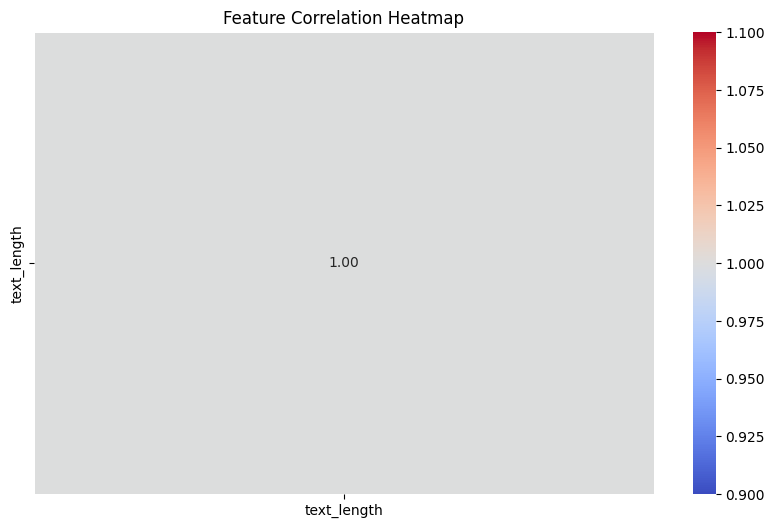

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Display the correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


sns.pairplot(df[['text_length', 'timestamp']], diag_kind='kde')
plt.show()


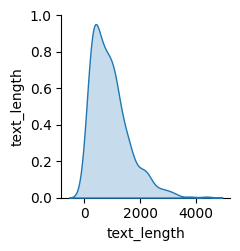

In [18]:
sns.pairplot(df[['text_length', 'timestamp']], diag_kind='kde')
plt.show()


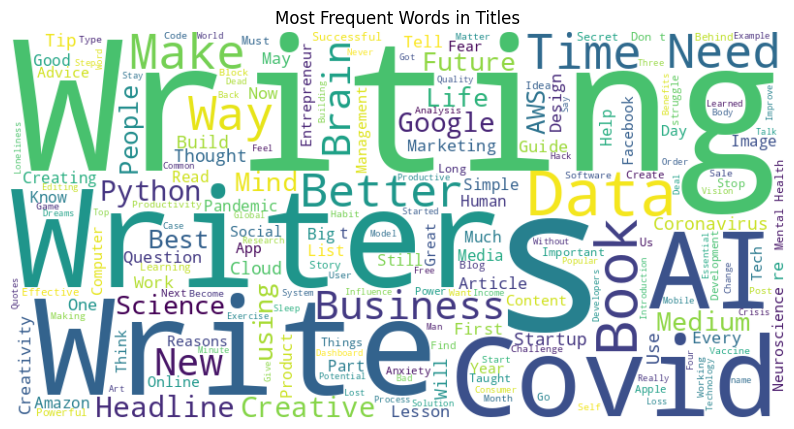

In [19]:
from wordcloud import WordCloud

text = ' '.join(df['title'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Titles')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-20-cfea6e7d2176>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df, x='Count', y='Word', palette='coolwarm')


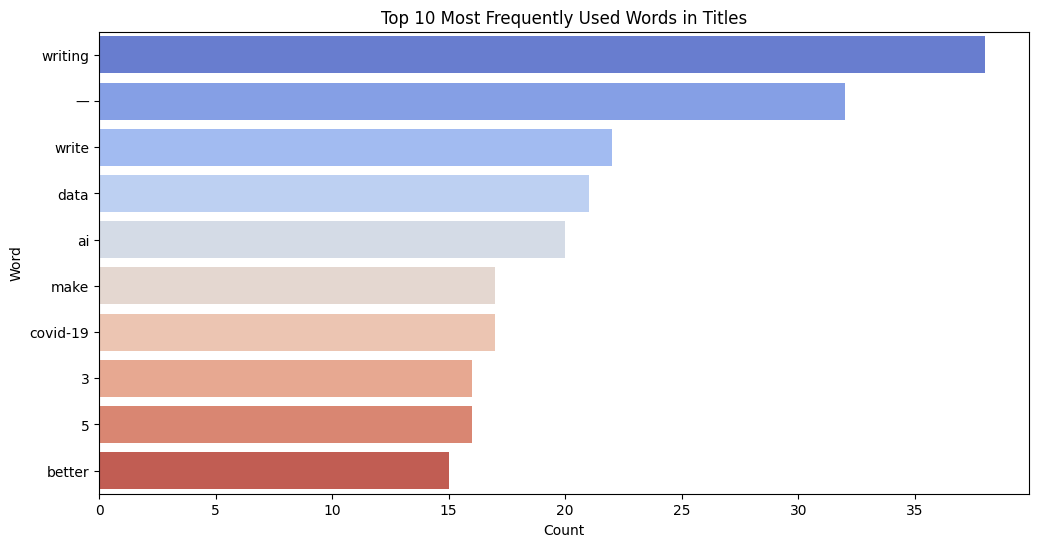

In [20]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Tokenize and clean words
words = [word.lower().strip(string.punctuation) for title in df['title'].dropna() for word in title.split()]
filtered_words = [word for word in words if word not in stop_words]

# Count word frequency
word_counts = Counter(filtered_words)
top_words = word_counts.most_common(10)

# Convert to DataFrame
words_df = pd.DataFrame(top_words, columns=['Word', 'Count'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=words_df, x='Count', y='Word', palette='coolwarm')
plt.title('Top 10 Most Frequently Used Words in Titles')
plt.show()


In [21]:
!pip install plotly

In [22]:
import plotly.express as px

# 1. Top 20 Most Frequent Tags
from collections import Counter
from ast import literal_eval

# Convert string lists to actual lists if needed
df['tags'] = df['tags'].apply(lambda x: literal_eval(x) if isinstance(x, str) else x)

# Flatten and count tags
all_tags = [tag for sublist in df['tags'] for tag in sublist]
tag_counts = Counter(all_tags)
top_tags = dict(tag_counts.most_common(20))

tag_df = pd.DataFrame({'Tag': list(top_tags.keys()), 'Count': list(top_tags.values())})

fig1 = px.bar(tag_df, x='Tag', y='Count', title='Top 20 Most Frequent Tags', text='Count')
fig1.show()

# 2. Article Length Distribution
fig2 = px.histogram(df, x='text_length', nbins=50, title='Distribution of Article Length (Text)')
fig2.show()

# 3. Box Plot: Article Length per Tag (top 5 tags only)
import numpy as np

# Create a mapping from tag to article length
tag_length_data = []
for idx, row in df.iterrows():
    for tag in row['tags'][:5]:  # top 5 tags for simplicity
        tag_length_data.append({'Tag': tag, 'Text Length': row['text_length']})

tag_length_df = pd.DataFrame(tag_length_data)

fig3 = px.box(tag_length_df, x='Tag', y='Text Length', title='Article Length by Tag')
fig3.show()

# 4. Timeline of Articles Published
df['timestamp'] = pd.to_datetime(df['timestamp'])  # Ensure datetime
df['month'] = df['timestamp'].dt.to_period('M').astype(str)

monthly_counts = df['month'].value_counts().sort_index()
time_df = pd.DataFrame({'Month': monthly_counts.index, 'Articles Published': monthly_counts.values})

fig4 = px.line(time_df, x='Month', y='Articles Published', title='Articles Published Over Time')
fig4.show()


<ipython-input-22-3fb9bdc5572a>:40: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



In [30]:
import pandas as pd
import plotly.express as px

# ✅ Step 1: Load CSV and skip bad lines
df = pd.read_csv('/content/AI-Powered Content Analysis and Recommendation.csv', on_bad_lines='skip', engine='python')

# ✅ Step 2: Clean and fix the timestamp column
# Convert with `utc=True` and `errors='coerce'` to handle mixed timezones & bad formats
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce', utc=True)

# ✅ Step 3: Drop rows where timestamp conversion failed
df = df.dropna(subset=['timestamp'])

# ✅ Step 4: Normalize (remove timezone info)
df['timestamp'] = df['timestamp'].dt.tz_convert(None)

# ✅ Step 5: Extract Month-Year string
df['month'] = df['timestamp'].dt.to_period('M').astype(str)

# ✅ Step 6: Group by month and count articles
monthly_counts = df['month'].value_counts().sort_index()
time_df = pd.DataFrame({
    'Month': monthly_counts.index,
    'Articles Published': monthly_counts.values
})

# ✅ Step 7: Interactive Timeline Plot using Plotly
fig = px.line(
    time_df,
    x='Month',
    y='Articles Published',
    title='📈 Articles Published Over Time',
    markers=True,
    labels={'Month': 'Month', 'Articles Published': 'Count'}
)
fig.update_layout(title_x=0.5)
fig.show()


<ipython-input-30-f2b3ebcd6496>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-30-f2b3ebcd6496>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### ✅ **STEP 5: Content Recommendation System**

#### ⚙️ Preprocessing for Recommendation
21. Convert `title` and `text` columns to strings.
22. Use `TfidfVectorizer` to transform the text data.
23. Fit a `NearestNeighbors` model using cosine similarity.

#### 🔍 Define the Recommendation Function
24. Match user input with the closest article title using `get_close_matches()`.
25. Get similar articles using the fitted Nearest Neighbors model.
26. Return or display top 5 recommended articles based on similarity.


In [35]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from difflib import get_close_matches

# ✅ Load your CSV (make sure to fix path as needed)
df = pd.read_csv('/content/AI-Powered Content Analysis and Recommendation.csv', on_bad_lines='skip', engine='python')

# ✅ Clean and prepare data
df = df.dropna(subset=['title', 'text', 'url']).reset_index(drop=True)
df['text'] = df['text'].astype(str).fillna('')
df['title'] = df['title'].astype(str).fillna('')
df['url'] = df['url'].astype(str).fillna('')

# ✅ Create TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

# ✅ Fit Nearest Neighbors model
nn_model = NearestNeighbors(n_neighbors=6, metric='cosine')
nn_model.fit(tfidf_matrix)

# ✅ Final Recommendation Function
def recommend_articles_improved(user_input_title):
    titles = df['title'].tolist()
    titles_lower = [t.lower() for t in titles]
    user_input_title = user_input_title.lower()

    # Fuzzy match to find closest known title
    closest_matches = get_close_matches(user_input_title, titles_lower, n=1, cutoff=0.3)

    if not closest_matches:
        return {"status": "error", "message": "❌ Title not found!"}

    matched_lower_title = closest_matches[0]
    matched_title = titles[titles_lower.index(matched_lower_title)]

    # Get index of matched title
    idx = df[df['title'] == matched_title].index[0]

    try:
        # Get nearest neighbors from TF-IDF vector
        article_vector = tfidf_matrix[idx]
        distances, indices = nn_model.kneighbors(article_vector, n_neighbors=6)

        # Build recommendations (excluding the input article itself)
        recommendations = []
        for i in range(1, len(indices[0])):
            sim_idx = indices[0][i]
            title = df.iloc[sim_idx].get('title', 'No Title')
            url = df.iloc[sim_idx].get('url', 'No URL')
            recommendations.append({"title": title, "url": url})

        return {
            "status": "success",
            "matched_title": matched_title,
            "recommendations": recommendations
        }

    except Exception as e:
        return {"status": "error", "message": f"❌ Matching failed: {str(e)}"}

# ✅ Example Usage
result = recommend_articles_improved("Doctor")  # Replace with any title or keyword

if result["status"] == "success":
    print(f"✅ Showing results for: **{result['matched_title']}**\n")
    for i, rec in enumerate(result["recommendations"], 1):
        print(f"{i}. {rec['title']}\n   🔗 {rec['url']}\n")
else:
    print(result["message"])


✅ Showing results for: **Editor**

1. Not Only Disappointed But Also Annoyed
   🔗 https://medium.com/illumination/request-for-patience-fc3fa79d110e

2. Editors are kingmakers
   🔗 https://medium.com/illumination/editors-are-kingmakers-febe3cc1f025

3. An Everything Shortform alarm to editors and potential writers!
   🔗 https://medium.com/everything-shortform/an-everything-shortform-alarm-to-editors-and-potential-writers-b7f14023c5ba

4. This is another Everything Shortform members notification regarding writers and editors.
   🔗 https://medium.com/everything-shortform/this-is-another-everything-shortform-members-notification-regarding-writers-and-editors-cb406d3b4c1f

5. If You Are An Editor, Please Be Reasonable When Asking for Changes
   🔗 https://medium.com/the-partnered-pen/if-you-are-an-editor-please-be-reasonable-when-asking-for-changes-87569083b8d8



In [36]:
pip install gradio pandas matplotlib seaborn plotly wordcloud scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.1 MB/s eta 0:00:00


### ✅ **STEP 6: Create Gradio Interface (Optional)**

27. Use `Gradio` to wrap your recommendation function with a user-friendly interface.
28. Provide a text input for title search and return top related articles.


In [43]:
import gradio as gr
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from difflib import get_close_matches
import csv

# === STEP 1: CLEAN CSV FILE (skip malformed rows) ===
input_file = "/content/AI-Powered Content Analysis and Recommendation.csv"
output_file = "cleaned_medium_articles.csv"
expected_fields = 6  # Update this if your file has a different number of columns

# Clean the CSV file
with open(input_file, 'r', encoding='utf-8') as infile, \
     open(output_file, 'w', newline='', encoding='utf-8') as outfile:

    reader = csv.reader(infile)
    writer = csv.writer(outfile)

    cleaned_rows = 0
    skipped_rows = 0

    for row in reader:
        if len(row) == expected_fields:
            writer.writerow(row)
            cleaned_rows += 1
        else:
            skipped_rows += 1

print(f"✅ Cleaned file saved as '{output_file}'")
print(f"✅ Rows kept: {cleaned_rows}")
print(f"⚠️ Skipped malformed rows: {skipped_rows}")

# === STEP 2: LOAD CLEANED DATA ===
df = pd.read_csv(output_file)
df.dropna(subset=['title', 'text'], inplace=True)
df = df.reset_index(drop=True)

# Ensure text columns are strings
df['title'] = df['title'].astype(str)
df['text'] = df['text'].astype(str)

# === STEP 3: TF-IDF VECTORIZATION & NEAREST NEIGHBORS ===
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

nn_model = NearestNeighbors(n_neighbors=6, metric='cosine')
nn_model.fit(tfidf_matrix)

# === STEP 4: RECOMMENDATION FUNCTION ===
def recommend_articles(title_input):
    titles = df['title'].tolist()
    closest_matches = get_close_matches(title_input, titles, n=1, cutoff=0.3)

    if not closest_matches:
        suggestions = get_close_matches(title_input, titles, n=3, cutoff=0.1)
        if suggestions:
            return f"❌ Title not found.\n\nDid you mean:\n- " + "\n- ".join(suggestions)
        return "❌ Title not found! Try refining your input."

    matched_title = closest_matches[0]
    idx = df[df['title'] == matched_title].index[0]

    article_vector = tfidf_matrix[idx]
    distances, indices = nn_model.kneighbors(article_vector, n_neighbors=6)

    output = f"✅ Showing results for: **{matched_title}**\n\n"

    for i in range(1, len(indices[0])):  # Skip the first (it's the input article itself)
        sim_idx = indices[0][i]
        title = df.iloc[sim_idx]['title']
        url = df.iloc[sim_idx].get('url', '🔗 No URL provided')
        snippet = df.iloc[sim_idx]['text'][:200].strip().replace('\n', ' ') + '...'
        output += f"{i}. **{title}**\n🔗 {url}\n📝 {snippet}\n\n"

    return output

# === STEP 5: GRADIO INTERFACE ===
interface = gr.Interface(
    fn=recommend_articles,
    inputs=gr.Textbox(label="🔍 Enter an article title"),
    outputs=gr.Markdown(label="📚 Recommended Articles"),
    title="🧠 Medium Article Recommender",
    description="Enter a Medium article title to discover similar articles using TF-IDF + Nearest Neighbors!",
    examples=[
        ["The Rise of AI in Everyday Life"],
        ["How to Learn Python Fast"],
        ["Machine Learning in Healthcare"],
        ["Data Science for Beginners"]
    ],
    theme="default"
)

# === STEP 6: LAUNCH ===
interface.launch()


✅ Cleaned file saved as 'cleaned_medium_articles.csv'
✅ Rows kept: 192369
⚠️ Skipped malformed rows: 0
Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://62faf1babce223422c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [39]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.7 MB/s eta 0:00:00


In [40]:
# 📦 Install required packages (uncomment if not already installed)
# !pip install pandas scikit-learn voila ipywidgets

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from difflib import get_close_matches
import ipywidgets as widgets
from IPython.display import display, Markdown

# ✅ Load and clean the dataset
file_path = "cleaned_medium_articles.csv"  # Replace with your actual file path
df = pd.read_csv(file_path, names=["id", "title", "author", "url", "timestamp", "text"], header=None)

df.dropna(subset=['title', 'text'], inplace=True)
df['title'] = df['title'].astype(str)
df['text'] = df['text'].astype(str)
df = df.reset_index(drop=True)

# ✅ TF-IDF and Nearest Neighbors setup
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

nn_model = NearestNeighbors(n_neighbors=6, metric='cosine')
nn_model.fit(tfidf_matrix)

# ✅ UI elements using ipywidgets
title_input = widgets.Text(
    value='',
    placeholder='Type an article title',
    description='🔍 Title:',
    layout=widgets.Layout(width='80%')
)

recommend_button = widgets.Button(description="Get Recommendations", button_style='success')
output = widgets.Output()

# ✅ Recommender function
def recommend_articles(_):
    with output:
        output.clear_output()
        titles = df['title'].tolist()
        closest_matches = get_close_matches(title_input.value, titles, n=1, cutoff=0.3)

        if not closest_matches:
            display(Markdown("❌ **Title not found! Try refining your input.**"))
            return

        matched_title = closest_matches[0]
        display(Markdown(f"✅ **Showing results for:** `{matched_title}`\n"))

        idx = df[df['title'] == matched_title].index[0]
        article_vector = tfidf_matrix[idx]
        distances, indices = nn_model.kneighbors(article_vector, n_neighbors=6)

        for i in range(1, len(indices[0])):
            sim_idx = indices[0][i]
            title = df.iloc[sim_idx]['title']
            url = df.iloc[sim_idx]['url']
            display(Markdown(f"{i}. **{title}**\n🔗 [Read more]({url})\n"))

# ✅ Connect button to action
recommend_button.on_click(recommend_articles)

# ✅ Display app interface
display(widgets.VBox([title_input, recommend_button, output]))


In [44]:
!git clone https://github.com/SNEHA-S-J/AI---powered-content-analysis-and-recommendation.git

Cloning into 'AI---powered-content-analysis-and-recommendation'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 974.34 KiB | 15.97 MiB/s, done.
